<a href="https://colab.research.google.com/github/ykitaguchi77/AdvancedPytorch_Colab/blob/master/8.%20%E3%80%90%E6%BC%94%E7%BF%92%E3%81%AE%E5%9B%9E%E7%AD%94%E4%BE%8B%E3%80%91Fashion%20MNIST%20using%20tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST using Tensorflow 2.0
参考サイト：<br>
https://qiita.com/koshian2/items/5029028fe6d01b243f44 <br>
https://ai-scholar.tech/image-recognition/tensorflow2-0-alpha/

#Tensorflow 2.0のセットアップ

In [3]:
!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf
tf.__version__ # '2.0.0'

'2.0.0-alpha0'

#データのダウンロード

In [5]:
import keras

fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


#画像を表示してみる

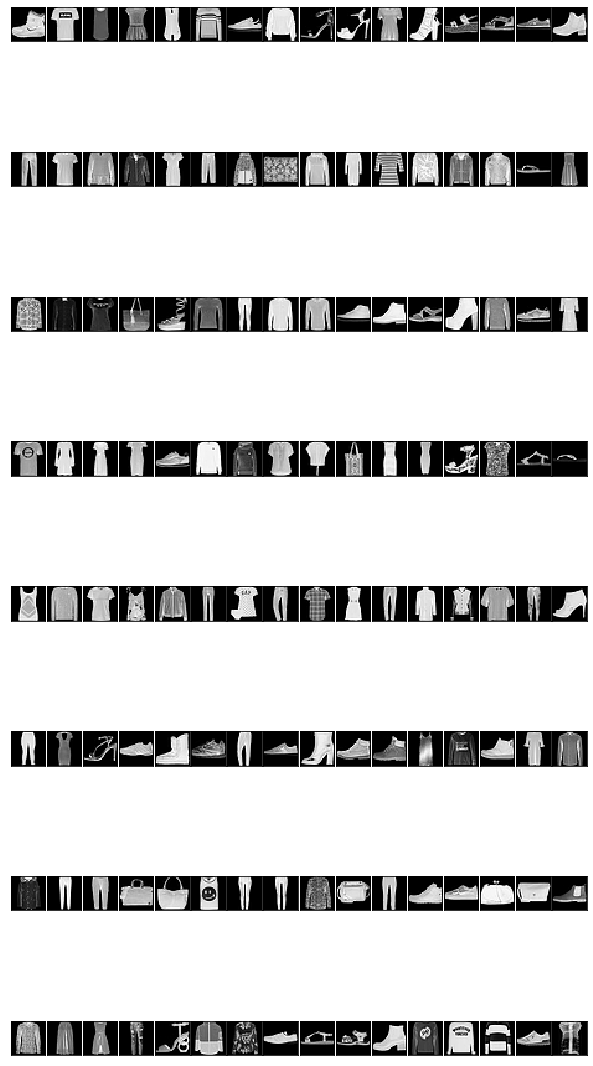

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# MNISTデータの表示
W = 16  # 横に並べる個数
H = 8   # 縦に並べる個数
fig = plt.figure(figsize=(H, W))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.0, hspace=0.05, wspace=0.05)
for i in range(W*H):
    ax = fig.add_subplot(H, W, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

plt.show()

#Modelの作成

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#モデルの訓練と評価

In [8]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5341 - accuracy: 0.8112
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3977 - accuracy: 0.8561
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3639 - accuracy: 0.8675
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3418 - accuracy: 0.8750
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3295 - accuracy: 0.8782
10000/10000 - 0s - loss: 0.3459 - accuracy: 0.8789


[0.3458703952550888, 0.8789]

#推測結果の表示①

array([3.2309574e-05, 1.3823239e-07, 4.7283794e-07, 1.3807515e-06,
       4.7678012e-07, 6.3384652e-02, 8.0669788e-06, 1.2771474e-01,
       1.7601653e-04, 8.0868179e-01], dtype=float32)

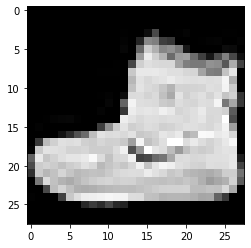

In [9]:
plt.imshow(x_train[0], cmap='gray')
predictions = model.predict(x_test)
predictions[0]

#推測結果の表示②

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i] 
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i] 
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    thisplot = plt.bar(range(10), predictions_array, color="#777777") #ラベルの縦棒は10種類
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')  #Predicted_labelは赤グラフ
    thisplot[true_label].set_color('blue')      #True_labelは青グラフ

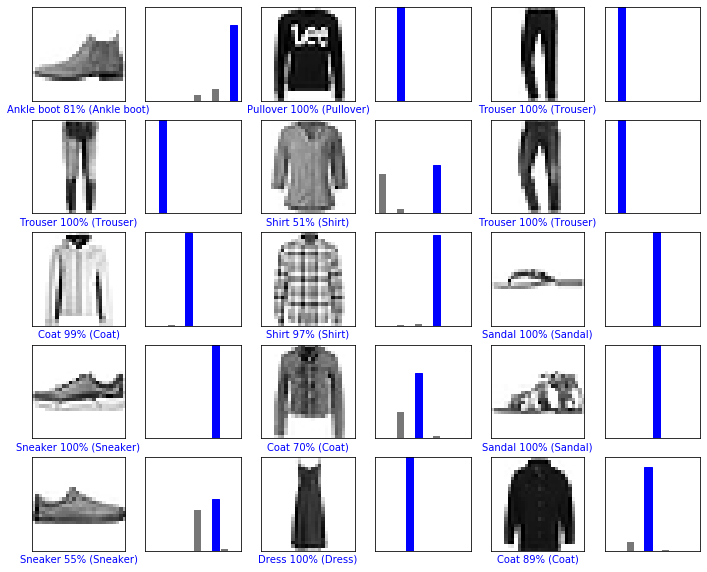

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)
plt.show()